# 20L-2128 Muhammad Ahmad Mamoon
# 20L-1149 Yousaf Khalid
# 20L-0928 Muhammad Ahmad

In [1]:
## Importing required Libraries

import pandas as pd
import numpy as np
from scipy.stats import zscore

In [2]:
## Reading csv

df=pd.read_csv('car_price_prediction.csv')
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [3]:
### Display concise summary information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

# **Data Cleaning**

In [4]:
## Checking the null values

df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [5]:
# Retrieve the dimensions

df.shape

(19237, 18)

In [6]:
## Check duplicated rows

df.duplicated().sum()

313

In [7]:
## Drop all duplicates

df.drop_duplicates(inplace=True)

In [8]:
column_name = 'Price'

# Calculate the lower and upper bounds for outliers (e.g., using the IQR method)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a boolean mask to identify outliers
outlier_mask = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)

# Use the mask to drop the outliers from the DataFrame
df = df[~outlier_mask]
df.shape

(17869, 18)

In [9]:
# Filter the DataFrame 'df' to include only rows where the 'Price' column is greater than $10,000.


df = df[df['Price'] > 10000]
df.shape

(10411, 18)

# **Data Transformation**

In [10]:
## Dropping the unnecessary columns

df.drop(['ID','Levy', 'Leather interior', 'Drive wheels', 'Color'], axis = 1, inplace = True)
df

,Price,Manufacturer,Model,Prod. year,Category,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Doors,Wheel,Airbags
0,13328,LEXUS,RX 450,2010,Jeep,Hybrid,3.5,186005 km,6.0,Automatic,04-May,Left wheel,12
1,16621,CHEVROLET,Equinox,2011,Jeep,Petrol,3,192000 km,6.0,Tiptronic,04-May,Left wheel,8
4,11726,HONDA,FIT,2014,Hatchback,Petrol,1.3,91901 km,4.0,Automatic,04-May,Left wheel,4
5,39493,HYUNDAI,Santa FE,2016,Jeep,Diesel,2,160931 km,4.0,Automatic,04-May,Left wheel,4
9,26657,LEXUS,RX 350,2007,Jeep,Petrol,3.5,128500 km,6.0,Automatic,04-May,Left wheel,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19222,10036,HYUNDAI,Sonata,2014,Sedan,LPG,2,735970 km,4.0,Automatic,04-May,Left wheel,4
19224,19130,KIA,Optima ex,2014,Sedan,Petrol,2.4,35800 km,4.0,Automatic,04-May,Left wheel,12
19227,29793,MERCEDES-BENZ,E 350,2014,Sedan,Diesel,3.5,219030 km,6.0,Automatic,04-May,Left wheel,12
19233,15681,HYUNDAI,Sonata,2011,Sedan,Petrol,2.4,161600 km,4.0,Tiptronic,04-May,Left wheel,8


In [11]:
## Checking count of Manufacturer column
df['Manufacturer'].value_counts()

Manufacturer
HYUNDAI          2782
TOYOTA           2055
MERCEDES-BENZ     895
CHEVROLET         629
FORD              620
BMW               551
HONDA             414
SSANGYONG         402
LEXUS             331
VOLKSWAGEN        301
KIA               293
NISSAN            238
MITSUBISHI        130
SUBARU            120
AUDI              101
JEEP               90
OPEL               66
FIAT               51
MAZDA              45
DODGE              39
MINI               33
SUZUKI             30
INFINITI           22
RENAULT            21
LAND ROVER         19
PORSCHE            19
JAGUAR             15
SKODA              13
LINCOLN             9
VOLVO               7
SCION               7
CHRYSLER            7
CADILLAC            6
BUICK               6
DAEWOO              5
CITROEN             4
PEUGEOT             4
ACURA               3
VAZ                 3
MASERATI            3
HUMMER              3
MERCURY             3
ALFA ROMEO          2
GMC                 2
GAZ                

In [12]:
## Merging Manufacturers having less than 20 records to "Others".
manufacturer_counts = df['Manufacturer'].value_counts()

manufacturers_to_replace = manufacturer_counts[manufacturer_counts < 20].index

df.loc[df['Manufacturer'].isin(manufacturers_to_replace), 'Manufacturer'] = 'Other'
df.loc[df['Manufacturer'] == 'Other', 'Model'] = 'Other'


In [13]:
## Display count of every value in Manufacturer column
df['Manufacturer'].value_counts()

Manufacturer
HYUNDAI          2782
TOYOTA           2055
MERCEDES-BENZ     895
CHEVROLET         629
FORD              620
BMW               551
HONDA             414
SSANGYONG         402
LEXUS             331
VOLKSWAGEN        301
KIA               293
NISSAN            238
Other             152
MITSUBISHI        130
SUBARU            120
AUDI              101
JEEP               90
OPEL               66
FIAT               51
MAZDA              45
DODGE              39
MINI               33
SUZUKI             30
INFINITI           22
RENAULT            21
Name: count, dtype: int64

In [14]:
## Label encoding the Manufacturer and model
from sklearn.preprocessing import LabelEncoder
manufacturer_le = LabelEncoder()
model_le = LabelEncoder()
df['Manufacturer_encoded'] = manufacturer_le.fit_transform(df['Manufacturer'])
df['Model_encoded'] = model_le.fit_transform(df['Model'])
print(df['Manufacturer'])
print(df['Model'])

0                LEXUS
1            CHEVROLET
4                HONDA
5              HYUNDAI
9                LEXUS
             ...      
19222          HYUNDAI
19224              KIA
19227    MERCEDES-BENZ
19233          HYUNDAI
19234          HYUNDAI
Name: Manufacturer, Length: 10411, dtype: object
0           RX 450
1          Equinox
4              FIT
5         Santa FE
9           RX 350
           ...    
19222       Sonata
19224    Optima ex
19227        E 350
19233       Sonata
19234       Tucson
Name: Model, Length: 10411, dtype: object


In [15]:
# Calculate the mean price of cars within each 'Category' and store the result in 'mean_price_category'.

mean_price_category = df[['Category', 'Price']].groupby('Category').mean()
mean_price_category

,Price
Category,
Cabriolet,22553.944444
Coupe,20870.140893
Goods wagon,14852.744186
Hatchback,17131.334938
Jeep,26272.613777
Limousine,23332.800000
Microbus,20002.225664
Minivan,23854.704255
Pickup,26563.200000


In [16]:
# This code categorizes car types into two classes based on their mean prices and prints the results.

# Initialize two empty lists 'class_1' and 'class_2' to categorize car types based on mean prices.
class_1 = []
class_2 = []

# Iterate through the 'mean_price_category' DataFrame to categorize car types.

for category, mean_price in mean_price_category.iterrows():
    if mean_price['Price'] <= 22000:
        class_1.append(category)
    else:
        class_2.append(category)

print('Categories with less than or equal to 21k mean price: ', class_1)
print('Categories with more than 21k mean price: ', class_2)

Categories with less than or equal to 21k mean price:  ['Coupe', 'Goods wagon', 'Hatchback', 'Microbus', 'Sedan']
Categories with more than 21k mean price:  ['Cabriolet', 'Jeep', 'Limousine', 'Minivan', 'Pickup', 'Universal']


In [17]:
## changing datatypes of engine volumn to float
df['Has Turbo'] = df['Engine volume'].str.contains('Turbo').astype(int)
df['Engine volume'] = df['Engine volume'].str.replace(' Turbo', '')
df['Engine volume'] = df['Engine volume'].astype(float)
df

,Price,Manufacturer,Model,Prod. year,Category,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Doors,Wheel,Airbags,Manufacturer_encoded,Model_encoded,Has Turbo
0,13328,LEXUS,RX 450,2010,Jeep,Hybrid,3.5,186005 km,6.0,Automatic,04-May,Left wheel,12,11,805,0
1,16621,CHEVROLET,Equinox,2011,Jeep,Petrol,3.0,192000 km,6.0,Tiptronic,04-May,Left wheel,8,2,415,0
4,11726,HONDA,FIT,2014,Hatchback,Petrol,1.3,91901 km,4.0,Automatic,04-May,Left wheel,4,6,432,0
5,39493,HYUNDAI,Santa FE,2016,Jeep,Diesel,2.0,160931 km,4.0,Automatic,04-May,Left wheel,4,7,836,0
9,26657,LEXUS,RX 350,2007,Jeep,Petrol,3.5,128500 km,6.0,Automatic,04-May,Left wheel,12,11,799,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19222,10036,HYUNDAI,Sonata,2014,Sedan,LPG,2.0,735970 km,4.0,Automatic,04-May,Left wheel,4,7,852,0
19224,19130,KIA,Optima ex,2014,Sedan,Petrol,2.4,35800 km,4.0,Automatic,04-May,Left wheel,12,10,690,0
19227,29793,MERCEDES-BENZ,E 350,2014,Sedan,Diesel,3.5,219030 km,6.0,Automatic,04-May,Left wheel,12,13,369,0
19233,15681,HYUNDAI,Sonata,2011,Sedan,Petrol,2.4,161600 km,4.0,Tiptronic,04-May,Left wheel,8,7,852,0


In [18]:
column_name = 'Engine volume'

# Calculate the lower and upper bounds for outliers (e.g., using the IQR method)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a boolean mask to identify outliers
outlier_mask = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)

# Use the mask to drop the outliers from the DataFrame
df = df[~outlier_mask]
df.shape

(9839, 16)

In [19]:
## Display count of all values for column name "Has Turbo"
df['Has Turbo'].value_counts()

Has Turbo
0    8534
1    1305
Name: count, dtype: int64

In [20]:
### Modifying the Category column in the dataset

category_data = df['Category']
new_category_data = []

for value in category_data:
    if value in class_1:
        new_category_data.append(1)
    else:
        new_category_data.append(2)

df['Category_encoded'] = new_category_data
df['Category_encoded']

C:\Users\DELL\AppData\Local\Temp\ipykernel_14624\3096875476.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Category_encoded'] = new_category_data


0        2
1        2
4        1
5        2
9        2
        ..
19222    1
19224    1
19227    1
19233    1
19234    2
Name: Category_encoded, Length: 9839, dtype: int64

In [21]:
## Display count of all values for column name "Fuel Type"

df['Fuel type'].value_counts()

Fuel type
Petrol            4758
Diesel            2619
Hybrid            1724
LPG                569
CNG                 89
Plug-in Hybrid      79
Hydrogen             1
Name: count, dtype: int64

In [22]:
### Creating the new fuel type data

fuel_type_data = df['Fuel type']
new_fuel_type_data = []

for value in fuel_type_data:
    if value in {'Hybrid', 'Hydrogen', 'Plug-in Hybrid'}:
        new_fuel_type_data.append('Other')
    else:
        new_fuel_type_data.append(value)

set(new_fuel_type_data)

{'CNG', 'Diesel', 'LPG', 'Other', 'Petrol'}

In [23]:

# This code updates the 'Fuel type' column in the DataFrame with new fuel type data and then counts the occurrences
# of each fuel type, displaying the counts.

df['Fuel type'] = new_fuel_type_data
df['Fuel type'].value_counts()

C:\Users\DELL\AppData\Local\Temp\ipykernel_14624\2366626464.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fuel type'] = new_fuel_type_data


Fuel type
Petrol    4758
Diesel    2619
Other     1804
LPG        569
CNG         89
Name: count, dtype: int64

In [24]:
df['Gear box type'].value_counts()

Gear box type
Automatic    6480
Tiptronic    2114
Manual        730
Variator      515
Name: count, dtype: int64

In [25]:
### Seperating the categories into class 1 and 2

gear_box_data = df['Gear box type']
new_gear_box_data = []

for value in gear_box_data:
    if value in {'Automatic', 'Variator'}:
        new_gear_box_data.append(1)
    else:
        new_gear_box_data.append(2)

set(new_gear_box_data)

{1, 2}

In [26]:

# This code updates the 'Gear box type' column in the DataFrame with new gear box type data and then counts the occurrences
# of each gear box type, displaying the counts.

df['Gear box type'] = new_gear_box_data
df['Gear box type'].value_counts()

C:\Users\DELL\AppData\Local\Temp\ipykernel_14624\4047289711.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gear box type'] = new_gear_box_data


Gear box type
1    6995
2    2844
Name: count, dtype: int64

In [27]:
### Creating the new Doors data

doors_data = df['Doors']
new_doors_data = []

for value in doors_data:
    if value == '04-May':
        new_doors_data.append('4-5')
    elif value == '02-Mar':
        new_doors_data.append('2-3')
    else:
        new_doors_data.append(value)

set(new_doors_data)

{'2-3', '4-5', '>5'}

In [28]:
# This code updates the 'Doors' column in the DataFrame with new doors data and then counts the occurrences of each
# number of doors, displaying the counts.

df['Doors'] = new_doors_data
df['Doors'].value_counts()

C:\Users\DELL\AppData\Local\Temp\ipykernel_14624\2213223888.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Doors'] = new_doors_data


Doors
4-5    9447
2-3     317
>5       75
Name: count, dtype: int64

In [29]:
### Creating the Age data

year_data = df['Prod. year']
age_data = []

for value in year_data:
    age_data.append(2023 - value)

len(set(age_data))

36

In [30]:
### This code assigns the 'age_data' to the 'Age' column and then counts and displays the occurrences of each age value in the DataFrame.
df['Age'] = age_data
df['Age'].value_counts()

C:\Users\DELL\AppData\Local\Temp\ipykernel_14624\2157643949.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = age_data


Age
9     1291
11    1223
10    1121
7      955
12     952
13     852
8      850
6      480
15     352
14     313
16     260
5      205
17     161
19     152
18     149
20     101
21      91
4       85
22      70
23      55
25      29
24      25
26      21
27      13
3       12
28       7
33       2
29       2
31       2
36       2
30       1
46       1
39       1
35       1
41       1
70       1
Name: count, dtype: int64

In [31]:

df.drop(['Prod. year'], axis = 1, inplace = True)
df

C:\Users\DELL\AppData\Local\Temp\ipykernel_14624\2594579919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Prod. year'], axis = 1, inplace = True)


,Price,Manufacturer,Model,Category,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Doors,Wheel,Airbags,Manufacturer_encoded,Model_encoded,Has Turbo,Category_encoded,Age
0,13328,LEXUS,RX 450,Jeep,Other,3.5,186005 km,6.0,1,4-5,Left wheel,12,11,805,0,2,13
1,16621,CHEVROLET,Equinox,Jeep,Petrol,3.0,192000 km,6.0,2,4-5,Left wheel,8,2,415,0,2,12
4,11726,HONDA,FIT,Hatchback,Petrol,1.3,91901 km,4.0,1,4-5,Left wheel,4,6,432,0,1,9
5,39493,HYUNDAI,Santa FE,Jeep,Diesel,2.0,160931 km,4.0,1,4-5,Left wheel,4,7,836,0,2,7
9,26657,LEXUS,RX 350,Jeep,Petrol,3.5,128500 km,6.0,1,4-5,Left wheel,12,11,799,0,2,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19222,10036,HYUNDAI,Sonata,Sedan,LPG,2.0,735970 km,4.0,1,4-5,Left wheel,4,7,852,0,1,9
19224,19130,KIA,Optima ex,Sedan,Petrol,2.4,35800 km,4.0,1,4-5,Left wheel,12,10,690,0,1,9
19227,29793,MERCEDES-BENZ,E 350,Sedan,Diesel,3.5,219030 km,6.0,1,4-5,Left wheel,12,13,369,0,1,9
19233,15681,HYUNDAI,Sonata,Sedan,Petrol,2.4,161600 km,4.0,2,4-5,Left wheel,8,7,852,0,1,12


In [32]:
### this code removes the ' km' suffix from the 'Mileage' column and
### then converts the column to a numeric data type for further analysis.


df['Mileage'] = df['Mileage'].str.replace(' km', '')

# Convert 'Mileage' to numeric type, handling errors with coerce to replace non-numeric values with NaN
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')

# Print the number of NaN values after conversion
print("Number of NaN values after conversion:", df['Mileage'].isnull().sum())


Number of NaN values after conversion: 0


C:\Users\DELL\AppData\Local\Temp\ipykernel_14624\420262211.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mileage'] = df['Mileage'].str.replace(' km', '')
C:\Users\DELL\AppData\Local\Temp\ipykernel_14624\420262211.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')


In [33]:
column_name = 'Mileage'

# Calculate the lower and upper bounds for outliers (e.g., using the IQR method)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a boolean mask to identify outliers
outlier_mask = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)

# Use the mask to drop the outliers from the DataFrame
df = df[~outlier_mask]
df.shape

(9479, 17)

In [34]:
column_name = 'Engine volume'

# Calculate the lower and upper bounds for outliers (e.g., using the IQR method)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a boolean mask to identify outliers
outlier_mask = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)

# Use the mask to drop the outliers from the DataFrame
df = df[~outlier_mask]
df.shape

(9479, 17)

In [35]:
# Perform one-hot encoding for specific categorical columns in the DataFrame 'df'.
# This is done to convert categorical variables into numerical format for machine learning models.

encoded_dataset = pd.get_dummies(data = df, columns = ['Category_encoded', 'Fuel type', 'Gear box type', 'Doors', 'Wheel'])
#encoded_dataset.drop(["Manufacturer", "Model"],axis=1, inplace=True)
encoded_dataset

,Price,Manufacturer,Model,Category,Engine volume,Mileage,Cylinders,Airbags,Manufacturer_encoded,Model_encoded,...,Fuel type_LPG,Fuel type_Other,Fuel type_Petrol,Gear box type_1,Gear box type_2,Doors_2-3,Doors_4-5,Doors_>5,Wheel_Left wheel,Wheel_Right-hand drive
0,13328,LEXUS,RX 450,Jeep,3.5,186005,6.0,12,11,805,...,False,True,False,True,False,False,True,False,True,False
1,16621,CHEVROLET,Equinox,Jeep,3.0,192000,6.0,8,2,415,...,False,False,True,False,True,False,True,False,True,False
4,11726,HONDA,FIT,Hatchback,1.3,91901,4.0,4,6,432,...,False,False,True,True,False,False,True,False,True,False
5,39493,HYUNDAI,Santa FE,Jeep,2.0,160931,4.0,4,7,836,...,False,False,False,True,False,False,True,False,True,False
9,26657,LEXUS,RX 350,Jeep,3.5,128500,6.0,12,11,799,...,False,False,True,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19221,15681,VOLKSWAGEN,Jetta,Sedan,2.5,81200,5.0,12,24,567,...,False,False,True,False,True,False,True,False,True,False
19224,19130,KIA,Optima ex,Sedan,2.4,35800,4.0,12,10,690,...,False,False,True,True,False,False,True,False,True,False
19227,29793,MERCEDES-BENZ,E 350,Sedan,3.5,219030,6.0,12,13,369,...,False,False,False,True,False,False,True,False,True,False
19233,15681,HYUNDAI,Sonata,Sedan,2.4,161600,4.0,8,7,852,...,False,False,True,False,True,False,True,False,True,False


In [36]:
encoded_dataset.drop_duplicates(inplace=True)
encoded_dataset.shape

(8677, 26)

In [37]:
print('max : ',encoded_dataset['Mileage'].max())
print('min : ',encoded_dataset['Mileage'].min())

max :  320899
min :  0


In [38]:
encoded_dataset['Airbags'].value_counts()

Airbags
4     3260
12    1535
8     1193
6      813
10     657
0      584
2      346
16      64
7       58
9       47
5       40
1       28
11      20
14      17
3       10
15       4
13       1
Name: count, dtype: int64

# **Normalization and Standardization**

In [39]:
# Normalize numerical columns using Min-Max scaling.
# Min-Max scaling transforms numerical features to a common scale, typically between 0 and 1.
# This helps ensure that all numerical features have equal weight and avoids issues with different scales in machine learning models.


from sklearn.preprocessing import StandardScaler

numerical_columns = ['Mileage']

scaler = StandardScaler()
encoded_dataset[numerical_columns] = scaler.fit_transform(encoded_dataset[numerical_columns])

# After this operation, the values in  'Mileage' columns will be scaled between 0 and 1.

In [40]:
encoded_dataset.shape

(8677, 26)

In [41]:
encoded_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8677 entries, 0 to 19234
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price                   8677 non-null   int64  
 1   Manufacturer            8677 non-null   object 
 2   Model                   8677 non-null   object 
 3   Category                8677 non-null   object 
 4   Engine volume           8677 non-null   float64
 5   Mileage                 8677 non-null   float64
 6   Cylinders               8677 non-null   float64
 7   Airbags                 8677 non-null   int64  
 8   Manufacturer_encoded    8677 non-null   int32  
 9   Model_encoded           8677 non-null   int32  
 10  Has Turbo               8677 non-null   int32  
 11  Age                     8677 non-null   int64  
 12  Category_encoded_1      8677 non-null   bool   
 13  Category_encoded_2      8677 non-null   bool   
 14  Fuel type_CNG           8677 non-null   bool

# **Dimension Reductionality**

In [42]:
# Prepare the dataset for dimensionality reduction.
# In this step, we create a new dataset 'dimension_reduce_dataset' by removing the 'Price' column.
# This is typically done when we want to perform dimensionality reduction techniques or when separating predictors from the target variable.


dimension_reduce_dataset = encoded_dataset
dimension_reduce_dataset = dimension_reduce_dataset.drop(columns=['Price','Manufacturer','Model','Category'])


In [43]:
dimension_reduce_dataset.shape

(8677, 22)

In [44]:
#Indirect Approach
import numpy as np
import pandas as pd
from scipy import linalg

In [45]:
column_names = dimension_reduce_dataset.columns.tolist()
print(column_names)

['Engine volume', 'Mileage', 'Cylinders', 'Airbags', 'Manufacturer_encoded', 'Model_encoded', 'Has Turbo', 'Age', 'Category_encoded_1', 'Category_encoded_2', 'Fuel type_CNG', 'Fuel type_Diesel', 'Fuel type_LPG', 'Fuel type_Other', 'Fuel type_Petrol', 'Gear box type_1', 'Gear box type_2', 'Doors_2-3', 'Doors_4-5', 'Doors_>5', 'Wheel_Left wheel', 'Wheel_Right-hand drive']


In [46]:

# Assuming df is your DataFrame
numeric_columns = dimension_reduce_dataset.select_dtypes(include=[np.number])
print('numeric_columns : ',numeric_columns)
column_names = numeric_columns.columns.tolist()

# Calculate the mean of each numeric column
M = numeric_columns.mean()

# Center numeric columns by subtracting the mean
C = numeric_columns - M

# Calculate the covariance matrix
V = np.cov(C.T)

print('M : ',M)
print('C : ',C)
print('V : ',V)

numeric_columns :         Engine volume   Mileage  Cylinders  Airbags  Manufacturer_encoded  \
0                3.5  0.947374        6.0       12                    11   
1                3.0  1.034512        6.0        8                     2   
4                1.3 -0.420446        4.0        4                     6   
5                2.0  0.582918        4.0        4                     7   
9                3.5  0.111527        6.0       12                    11   
...              ...       ...        ...      ...                   ...   
19219            1.8  0.287505        4.0       12                    23   
19221            2.5 -0.575987        5.0       12                    24   
19224            2.4 -1.235885        4.0       12                    10   
19233            2.4  0.592642        4.0        8                     7   
19234            2.0 -0.064857        4.0        4                     7   

       Model_encoded  Has Turbo  Age  
0                805         

In [47]:
#calculate eigen vectors and values
eigen_values, eigen_vectors = linalg.eig(V)
print(eigen_values)
print(eigen_vectors)

[7.31411409e+04+0.j 6.26160471e+01+0.j 1.71638518e+01+0.j
 1.25677368e+01+0.j 8.28990521e-01+0.j 6.85517844e-01+0.j
 1.60925594e-01+0.j 1.13448495e-01+0.j]
[[-8.32882326e-05  2.81968373e-03  2.54963141e-02  4.71051037e-02
  -8.68481830e-02 -3.70822274e-01 -8.90296068e-01  2.43811882e-01]
 [-4.84073597e-04 -1.43746858e-03  9.46980591e-02  3.15094552e-02
  -9.82016938e-01  1.56671360e-01  3.24815902e-02 -8.88233708e-03]
 [ 1.43365259e-04  5.61445504e-03  3.44280152e-02  7.48481719e-02
  -1.26551555e-01 -9.11312860e-01  3.72386654e-01 -8.94576710e-02]
 [ 1.37128877e-03 -8.19017441e-02 -3.72953661e-01  9.21755321e-01
   4.37565779e-03  6.45457719e-02  5.40674736e-03 -1.86650102e-02]
 [ 5.92040281e-04 -9.96174432e-01  3.48952154e-03 -8.60372269e-02
  -3.14294949e-03 -1.32771039e-02 -1.41483819e-04  5.94885236e-03]
 [-9.99998164e-01 -6.68765314e-04 -1.55373951e-03  8.07354663e-04
   3.49390919e-04 -1.53930667e-04  1.09859382e-04 -3.58794856e-05]
 [-4.50815334e-06  3.80455782e-03  7.43052236e

In [48]:
#check explained variance ratio of each component
for i in range(8):
  print(eigen_values[i] / np.sum(eigen_values))

(0.9987146014681011+0j)
(0.0008549984285203372+0j)
(0.00023436590094759815+0j)
(0.00017160768946961307+0j)
(1.1319551858334015e-05+0j)
(9.360486749571432e-06+0j)
(2.1973780892582e-06+0j)
(1.5490962642993539e-06+0j)


In [49]:
#sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]
print(sorted_index)

sorted_eigenvalue = eigen_values[sorted_index]
print(sorted_eigenvalue)

#similarly sort the eigenvectors
sorted_eigenvectors = eigen_vectors[:,sorted_index]
print(sorted_eigenvectors)

[0 1 2 3 4 5 6 7]
[7.31411409e+04+0.j 6.26160471e+01+0.j 1.71638518e+01+0.j
 1.25677368e+01+0.j 8.28990521e-01+0.j 6.85517844e-01+0.j
 1.60925594e-01+0.j 1.13448495e-01+0.j]
[[-8.32882326e-05  2.81968373e-03  2.54963141e-02  4.71051037e-02
  -8.68481830e-02 -3.70822274e-01 -8.90296068e-01  2.43811882e-01]
 [-4.84073597e-04 -1.43746858e-03  9.46980591e-02  3.15094552e-02
  -9.82016938e-01  1.56671360e-01  3.24815902e-02 -8.88233708e-03]
 [ 1.43365259e-04  5.61445504e-03  3.44280152e-02  7.48481719e-02
  -1.26551555e-01 -9.11312860e-01  3.72386654e-01 -8.94576710e-02]
 [ 1.37128877e-03 -8.19017441e-02 -3.72953661e-01  9.21755321e-01
   4.37565779e-03  6.45457719e-02  5.40674736e-03 -1.86650102e-02]
 [ 5.92040281e-04 -9.96174432e-01  3.48952154e-03 -8.60372269e-02
  -3.14294949e-03 -1.32771039e-02 -1.41483819e-04  5.94885236e-03]
 [-9.99998164e-01 -6.68765314e-04 -1.55373951e-03  8.07354663e-04
   3.49390919e-04 -1.53930667e-04  1.09859382e-04 -3.58794856e-05]
 [-4.50815334e-06  3.8045578

In [50]:
 #select the first n eigenvectors, n is desired dimension
# of our final reduced data.

n_components = 4 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:, 0:n_components]

In [51]:
eigenvector_subset.shape

(8, 4)

In [52]:
C.shape

(8677, 8)

In [53]:
X_reduced = np.dot(C,  eigenvector_subset)
X_reduced

array([[-2.55421976e+02,  3.80576135e-01, -5.76569261e-01,
         6.33561275e+00],
       [ 1.34567579e+02,  9.96256845e+00,  5.63329611e-01,
         2.72155715e+00],
       [ 1.17568311e+02,  6.36877400e+00, -9.73209227e-01,
        -2.66859047e+00],
       ...,
       [-1.40417574e+02,  1.56059469e+00, -4.39291974e+00,
         4.59572228e+00],
       [-3.02428681e+02,  4.67716030e+00, -2.24204981e-01,
         2.45230252e+00],
       [-3.76434765e+02,  4.92556383e+00,  2.00214267e+00,
        -8.48839838e-01]])

In [54]:
X_reduced = np.dot(eigenvector_subset.transpose() , C.transpose() ).transpose()
X_reduced

array([[-2.55421976e+02,  3.80576135e-01, -5.76569261e-01,
         6.33561275e+00],
       [ 1.34567579e+02,  9.96256845e+00,  5.63329611e-01,
         2.72155715e+00],
       [ 1.17568311e+02,  6.36877400e+00, -9.73209227e-01,
        -2.66859047e+00],
       ...,
       [-1.40417574e+02,  1.56059469e+00, -4.39291974e+00,
         4.59572228e+00],
       [-3.02428681e+02,  4.67716030e+00, -2.24204981e-01,
         2.45230252e+00],
       [-3.76434765e+02,  4.92556383e+00,  2.00214267e+00,
        -8.48839838e-01]])

In [55]:
#new dataframe with reduced features
df1 = pd.DataFrame(X_reduced,columns=["PC1", "PC2","PC3","PC4"])
df1

,PC1,PC2,PC3,PC4
0,-255.421976,0.380576,-0.576569,6.335613
1,134.567579,9.962568,0.563330,2.721557
2,117.568311,6.368774,-0.973209,-2.668590
3,-286.428727,5.162014,-3.328511,-3.095256
4,-249.424841,0.297194,2.119517,7.401514
...,...,...,...,...
8672,-183.411572,-11.451844,-3.363430,3.897387
8673,-17.410781,-12.328173,-3.131516,3.757942
8674,-140.417574,1.560595,-4.392920,4.595722
8675,-302.428681,4.677160,-0.224205,2.452303


# **Data Validation**

In [56]:
# Data Profiling: Check basic statistics and data types
data_profile = encoded_dataset.describe(include='all')

# Data Completeness: Check for missing values
missing_values = encoded_dataset.isnull().sum()

# Data Consistency: Check for duplicate rows
duplicate_rows = encoded_dataset[encoded_dataset.duplicated()]

# Print the results
print("Data Profiling:")
print(data_profile)
print("\nMissing Values:")
print(missing_values)
print("\nDuplicate Rows:")
print(duplicate_rows)

Data Profiling:
               Price Manufacturer  Model Category  Engine volume  \
count    8677.000000         8677   8677     8677    8677.000000   
unique           NaN           25    900       11            NaN   
top              NaN      HYUNDAI  Prius    Sedan            NaN   
freq             NaN         2155    652     3868            NaN   
mean    21282.916100          NaN    NaN      NaN       2.075372   
std      9216.106919          NaN    NaN      NaN       0.524275   
min     10017.000000          NaN    NaN      NaN       0.800000   
25%     14113.000000          NaN    NaN      NaN       1.600000   
50%     18817.000000          NaN    NaN      NaN       2.000000   
75%     25716.000000          NaN    NaN      NaN       2.400000   
max     47120.000000          NaN    NaN      NaN       3.500000   

             Mileage    Cylinders      Airbags  Manufacturer_encoded  \
count   8.677000e+03  8677.000000  8677.000000           8677.000000   
unique           NaN   

In [57]:
import pandas as pd

# Assuming df is your DataFrame
encoded_dataset.to_csv('used_in_model_training.csv', index=False)


In [58]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame, X contains features, and y contains the target variable
X = encoded_dataset.drop(['Price','Manufacturer', 'Model','Category'],axis=1)  # Assuming 'Price' is the target variable
y = encoded_dataset['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (6941, 22)
X_test shape: (1736, 22)
y_train shape: (6941,)
y_test shape: (1736,)


In [59]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,accuracy_score
from sklearn.model_selection import train_test_split

# Assuming X_train, X_test, y_train, y_test are already defined
# Convert data to DMatrix format used by XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set hyperparameters
params = {
    'objective': 'reg:squarederror',  # for regression tasks
    'eval_metric': 'rmse',  # root mean squared error
    'eta': 0.08,  # learning rate
    'max_depth': 8,  # maximum depth of a tree
    'subsample': 0.9,  # fraction of samples used for training
    'colsample_bytree': 0.8 # fraction of features used for training
}

# Train the XGBoost model
num_rounds = 180 # You can adjust the number of boosting rounds
xg_model = xgb.train(params, dtrain, num_rounds)

# Make predictions on the test set
y_pred_xgb = xg_model.predict(dtest)

# Evaluate the XGBoost model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
accuracy = accuracy_score(y_test, y_pred_xgb.round())
print(f'Accuracy (XGBoost): {accuracy}')
print(f'Mean Squared Error (XGBoost): {mse_xgb}')
print(f'Root Mean Squared Error (XGBoost): {rmse_xgb}')
print(f'Mean Absolute Error (XGBoost): {mae_xgb}')
print(f'R-squared (XGBoost): {r2_xgb}')


Accuracy (XGBoost): 0.0
Mean Squared Error (XGBoost): 23308514.76807103
Root Mean Squared Error (XGBoost): 4827.889266343112
Mean Absolute Error (XGBoost): 3427.6272928967455
R-squared (XGBoost): 0.7376437510171518


In [60]:
import xgboost as xgb
import pickle
from sklearn.preprocessing import MinMaxScaler

# Assuming xg_model and scaler are already defined

# Save the model and normalization parameters
model_data = {'xg_model': xg_model, 'scaler': scaler, 'other_info': 'additional data'}
with open('xg_model.pkl', 'wb') as file:
    pickle.dump(model_data, file)



In [61]:
import numpy as np

# Assuming 'y' is your target variable
# Replace 'y' with your actual target variable
target_variable = y

# Calculate the standard deviation
variability = np.std(target_variable)

print(f"Standard Deviation (Variability) of the Target Variable: {variability}")


Standard Deviation (Variability) of the Target Variable: 9215.575838199662


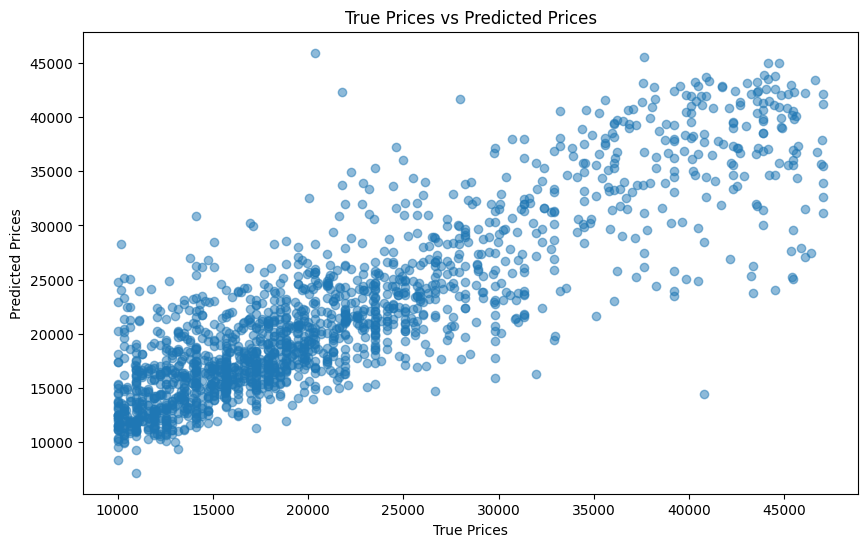

In [62]:
import matplotlib.pyplot as plt

# Assuming y_test contains true prices and y_pred_xgb contains predicted prices
# Replace these variables with your actual data
true_prices = y_test
predicted_prices = y_pred_xgb

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(true_prices, predicted_prices, alpha=0.5)
plt.title('True Prices vs Predicted Prices')
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.show()


In [63]:
print("average price value : ",encoded_dataset['Price'].mean())

average price value :  21282.916100034574


In [64]:
other_manufacturer = "Other"
if other_manufacturer in encoded_dataset['Manufacturer'].values:
  other_manufacturer_index = encoded_dataset[encoded_dataset['Manufacturer'] == other_manufacturer].index[0]
  other_model_encoded = encoded_dataset['Model_encoded'][other_manufacturer_index]
  other_manufacturer_encoded = encoded_dataset['Manufacturer_encoded'][other_manufacturer_index]
  print("For Manufacturer 'Other':")
  print("Model_encoded:", other_model_encoded)
  print("Manufacturer_encoded:", other_manufacturer_encoded)
else:
  print("The value 'Other' is not found in the 'Manufacturer' column.")

For Manufacturer 'Other':
Model_encoded: 695
Manufacturer_encoded: 18


In [65]:
used_df = pd.read_csv('used_in_model_training.csv')
used_df

,Price,Manufacturer,Model,Category,Engine volume,Mileage,Cylinders,Airbags,Manufacturer_encoded,Model_encoded,...,Fuel type_LPG,Fuel type_Other,Fuel type_Petrol,Gear box type_1,Gear box type_2,Doors_2-3,Doors_4-5,Doors_>5,Wheel_Left wheel,Wheel_Right-hand drive
0,13328,LEXUS,RX 450,Jeep,3.5,0.947374,6.0,12,11,805,...,False,True,False,True,False,False,True,False,True,False
1,16621,CHEVROLET,Equinox,Jeep,3.0,1.034512,6.0,8,2,415,...,False,False,True,False,True,False,True,False,True,False
2,11726,HONDA,FIT,Hatchback,1.3,-0.420446,4.0,4,6,432,...,False,False,True,True,False,False,True,False,True,False
3,39493,HYUNDAI,Santa FE,Jeep,2.0,0.582918,4.0,4,7,836,...,False,False,False,True,False,False,True,False,True,False
4,26657,LEXUS,RX 350,Jeep,3.5,0.111527,6.0,12,11,799,...,False,False,True,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8672,19444,TOYOTA,Prius,Sedan,1.8,0.287505,4.0,12,23,733,...,False,True,False,True,False,False,True,False,True,False
8673,15681,VOLKSWAGEN,Jetta,Sedan,2.5,-0.575987,5.0,12,24,567,...,False,False,True,False,True,False,True,False,True,False
8674,19130,KIA,Optima ex,Sedan,2.4,-1.235885,4.0,12,10,690,...,False,False,True,True,False,False,True,False,True,False
8675,15681,HYUNDAI,Sonata,Sedan,2.4,0.592642,4.0,8,7,852,...,False,False,True,False,True,False,True,False,True,False


In [66]:
encoded_dataset['Category'].value_counts()

Category
Sedan          3868
Jeep           2339
Hatchback      1403
Minivan         365
Coupe           206
Microbus        195
Universal       179
Goods wagon      83
Pickup           22
Cabriolet        15
Limousine         2
Name: count, dtype: int64